In [1]:
import pandas as pd
#LogisticRegression-class which we are using from sklearn
from sklearn.linear_model import LogisticRegression

In [2]:
#Load the data set
claimants = pd.read_csv("claimants.csv")
claimants.head()
#y-Attorney
#with the given critieria will u go for a attorney or not ----or directly go for a claim
#Attorney---0---not hire lawyer
#Attorney---1--- hire lawyer

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
claimants.info() 
#in 1340 data CLMSEX, CLMINSUR , SEATBELT , CLMAGE few data is not provided 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [4]:
#Shape of the data set
claimants.shape

(1340, 7)

In [7]:
# dropping the case number columns as it is not required
claimants.drop(["CASENUM"],inplace=True,axis = 1)

In [8]:
#Shape of the data set
claimants.shape

(1340, 6)

In [9]:
# Removing NA values in data set
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [10]:
claimants

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1334,1,1.0,1.0,0.0,16.0,0.060
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [11]:
# Dividing our data into input and output variables
#x=all rows..starting from the 1st column till the end of the dataset
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]
# y= all row and 0th column

In [15]:
X = claimants.iloc[:,1:]
X

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1334,1.0,1.0,0.0,16.0,0.060
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [16]:
Y = claimants.iloc[:,0]
Y

0       0
1       1
2       1
3       0
4       1
       ..
1334    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1096, dtype: int64

In [17]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [18]:
#Predict for X dataset
y_pred = classifier.predict(X)
#here i will get answer in 0 or 1 using the cutoff value 0.5

In [20]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [21]:
y_pred_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [22]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[381 197]
 [123 395]]


In [ ]:
#381 true positive cases 
#395 true negative cases

In [23]:
#Accuracy=(TP+TN/TP+TN+FP+FN)
((381+395)/(381+197+123+395))*100

70.8029197080292

In [ ]:
#Now we dnt know the accuracy is balanced or imbalanced

In [24]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))
#Support tells us how many rows in our data are classified as 0 / 1 / accuracy....

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [25]:
classifier.predict_proba(X)
#array 1..will give us the probabilty of class 0 and array 2..will give us the probabilty of class 1

array([[9.99996954e-01, 3.04621690e-06],
       [4.92851125e-01, 5.07148875e-01],
       [4.24833157e-01, 5.75166843e-01],
       ...,
       [2.60971335e-01, 7.39028665e-01],
       [7.14059407e-01, 2.85940593e-01],
       [3.19568787e-01, 6.80431213e-01]])

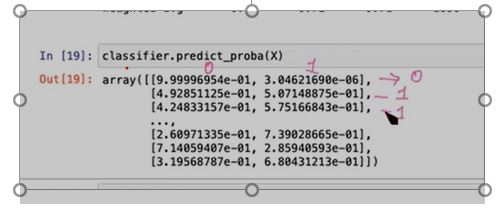

In [29]:
prob=pd.DataFrame(classifier.predict_proba(X))
prob

,0,1
0,0.999997,0.000003
1,0.492851,0.507149
2,0.424833,0.575167
3,0.502210,0.497790
4,0.359246,0.640754
...,...,...
1091,0.287918,0.712082
1092,0.574174,0.425826
1093,0.260971,0.739029
1094,0.714059,0.285941


In [26]:
y_pred_df # this is for 2 class classification

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [ ]:
# ROC Curve

Text(0, 0.5, 'True Positive Rate')

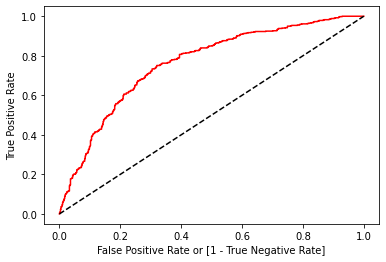

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [28]:
auc

0.7108589063606365

In [ ]:
#the accuracy and AUC matches
#reason it is matching coz we have a pretty matching dataset